# Electricity demand forecasting

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime

In [15]:
# Load and clean the dataset
data = pd.read_csv('data/dataset.csv', delimiter=';')
data = data[data['Power [MW]'] != '-']
data['Power [MW]'] = data['Power [MW]'].str.replace(',', '.').astype(float)
data[['Date', 'Time']] = data['Date'].str.split(' ', expand=True)
data['Date'] = pd.to_datetime(data['Date'], format='%d.%m.%Y').dt.strftime("%Y-%m-%d")
data = data.reindex(columns=['Date', 'Time', 'Power [MW]'])
data.head()

,Date,Time,Power [MW]
384,2015-01-05,00:00,56.00
385,2015-01-05,00:15,56.00
386,2015-01-05,00:30,56.00
387,2015-01-05,00:45,56.00
388,2015-01-05,01:00,56.25


In [ ]:
url = "https://digidates.de/api/v1/germanpublicholidays?year=2016&region=de-be"
response = requests.get(url)

holidays = response.json()
holiday_dates = [holiday for holiday in holidays.keys()]
data['Holiday'] = data['Date'].isin(holiday_dates)
data.head()

,Date,Time,Power [MW],Holiday
384,2015-01-05,00:00,56.00,False
385,2015-01-05,00:15,56.00,False
386,2015-01-05,00:30,56.00,False
387,2015-01-05,00:45,56.00,False
388,2015-01-05,01:00,56.25,False


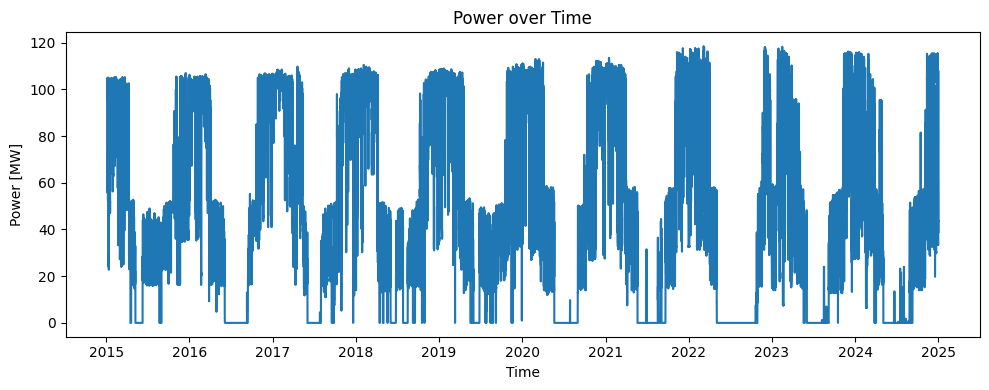

In [4]:
plt.figure(figsize=(10,4))
plt.plot(data['Date'], data['Power [MW]'])
plt.title('Power over Time')
plt.xlabel('Time')
plt.ylabel('Power [MW]')
plt.tight_layout()
plt.show()